<a href="https://colab.research.google.com/github/IngridDirckx/Datafiles-eindopdracht/blob/main/Eindopdracht_vraag_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#importeren co2 emissie per inwoner per land en per jaar
dfcapita = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/co2-vraag-1/main/co-emissions-per-capita.csv', sep=",")


In [ ]:
#Tabel opschonen en klaarmaken voor analyse
#kolommen verwijderen
dfcapita = dfcapita.drop(columns=['Code'])
#kolomnaan wijzigen
dfcapita = dfcapita.rename(columns={'Annual CO₂ emissions (per capita)':'co2 capita'})
#kopie maken van dfcapita,met alleen nog maar de waarden van de jaren na 2020
dfcapita_recent = dfcapita.copy()
# Verwijder rijen waarbij de waarde in de kolom 'Year' gelijk is aan 2021, 2022
dfcapita_recent = dfcapita_recent.loc[dfcapita_recent['Year'].isin([2021, 2022])]
#verwijderen van rijen die geen land zijn
dfcapita_recent = dfcapita_recent[~dfcapita_recent['Entity'].isin(['World', 'Europe', 'Africa', 'Oceania', 'North America','High-income countries', 'Europe (excl. EU-28)', 'Europe (excl. EU-27)', \
                       'Upper-middle-income countries', 'Asia', 'Asia (excl. China and India)', 'European Union (27)', 'European Union (28)', 'Low-income countries', 'Lower-middle-income countries', 'South America' ])]


dfcapita_recent

,Entity,Year,co2 capita
72,Afghanistan,2021,0.306317
73,Afghanistan,2022,0.295364
390,Albania,2021,1.717741
391,Albania,2022,1.743200
497,Algeria,2021,4.079527
...,...,...,...
26406,Yemen,2022,0.337017
26478,Zambia,2021,0.444877
26479,Zambia,2022,0.445701
26598,Zimbabwe,2021,0.524972


In [ ]:
#tabel maken voor alleen het jaar 2021
#tabel kopieren en met alleen maar waarden uit 2021 weergeven
dfcapita_2021 = dfcapita_recent.copy()
# Verwijder rijen waarbij de waarde in de kolom 'Year' gelijk is aan 2021
dfcapita_2021 = dfcapita_2021.loc[dfcapita_2021['Year'].isin([2021])]
#kolomnaam wijzigen naar alleen jaar 2021
dfcapita_2021 = dfcapita_2021.rename(columns={'co2 capita': '2021'})
#kolom Year verwijderen
dfcapita_2021 = dfcapita_2021.drop(columns=['Year'])
dfcapita_2021

,Entity,2021
72,Afghanistan,0.306317
390,Albania,1.717741
497,Algeria,4.079527
725,Andorra,4.592206
798,Angola,0.507356
...,...,...
26071,Vietnam,3.617115
26104,Wallis and Futuna,2.296465
26405,Yemen,0.351344
26478,Zambia,0.444877


In [ ]:
# tabel maken voor alleen het jaar 2022
#tabel kopieren en met alleen maar waarden uit 2022 weergeven
dfcapita_2022 = dfcapita_recent.copy()
# Verwijder rijen waarbij de waarde in de kolom 'Year' gelijk is aan 2022
dfcapita_2022 = dfcapita_2022.loc[dfcapita_2022['Year'].isin([2022])]
#kolomnaam wijzigen naar 2022
dfcapita_2022 = dfcapita_2022.rename(columns={'co2 capita': '2022'})
#kolom Year verwijderen
dfcapita_2022 = dfcapita_2022.drop(columns=['Year'])
dfcapita_2022

,Entity,2022
73,Afghanistan,0.295364
391,Albania,1.743200
498,Algeria,3.927226
726,Andorra,4.617124
799,Angola,0.451552
...,...,...
26072,Vietnam,3.499517
26105,Wallis and Futuna,2.281908
26406,Yemen,0.337017
26479,Zambia,0.445701


In [ ]:
#beide tabellen samenvoegen tot 1 tabel. Beide tabellen hebben een gelijk aantal rijen
merged_df = pd.merge(dfcapita_2021, dfcapita_2022, on='Entity', how='outer')
merged_df


,Entity,2021,2022
0,Afghanistan,0.306317,0.295364
1,Albania,1.717741,1.743200
2,Algeria,4.079527,3.927226
3,Andorra,4.592206,4.617124
4,Angola,0.507356,0.451552
...,...,...,...
210,Vietnam,3.617115,3.499517
211,Wallis and Futuna,2.296465,2.281908
212,Yemen,0.351344,0.337017
213,Zambia,0.444877,0.445701


In [ ]:
# met behulp van de merged tabel een vergelijking maken tussen beide jaren
#berekenen relatieve verandering 2022 t.o.v. 2022 van uitstoot per inwoner
merged_df['rel_2022'] = round((merged_df['2022']-merged_df['2021'] )/ merged_df['2021'] * 100,2)
merged_df

,Entity,2021,2022,rel_2022
0,Afghanistan,0.306317,0.295364,-3.58
1,Albania,1.717741,1.743200,1.48
2,Algeria,4.079527,3.927226,-3.73
3,Andorra,4.592206,4.617124,0.54
4,Angola,0.507356,0.451552,-11.00
...,...,...,...,...
210,Vietnam,3.617115,3.499517,-3.25
211,Wallis and Futuna,2.296465,2.281908,-0.63
212,Yemen,0.351344,0.337017,-4.08
213,Zambia,0.444877,0.445701,0.19


In [ ]:
#dataframe geschikt maken voor een grafische weergave
# copy maken van de gemerge tabel met alleen de relevante kolommen meenemen, om de grafiek te plotten
df_merged_rel = merged_df[['Entity', 'rel_2022']]
df_merged_rel

,Entity,rel_2022
0,Afghanistan,-3.58
1,Albania,1.48
2,Algeria,-3.73
3,Andorra,0.54
4,Angola,-11.00
...,...,...
210,Vietnam,-3.25
211,Wallis and Futuna,-0.63
212,Yemen,-4.08
213,Zambia,0.19


In [ ]:
#opmaak en filtering voor het maken van een grafiek met de grootste dalers uit de tabel
#aanpassen kolomnamen
df_merged_rel = df_merged_rel.rename(columns={'Entity': 'Country', 'rel_2022': 'delta 2022'})
#we zijn op zoek naar de landen die de grootste daling hebben ( en daarmee een verbetering van de co2 emissie)
df_smallest_changer = df_merged_rel.nsmallest(10, 'delta 2022')
#de index aanpassen naar Country om een tabel te gaan maken
df_smallest_changer.set_index('Country', inplace=True)
# de negatieve waarden absoluut maken om een betere grafiek te krijgen
df_smallest_changer['delta 2022'] = df_smallest_changer['delta 2022'].abs()
df_smallest_changer


,delta 2022
Country,
Ukraine,26.30
Sri Lanka,14.11
Pakistan,12.09
Equatorial Guinea,12.00
Luxembourg,11.88
Democratic Republic of Congo,11.48
Central African Republic,11.22
Hungary,11.03
Angola,11.00


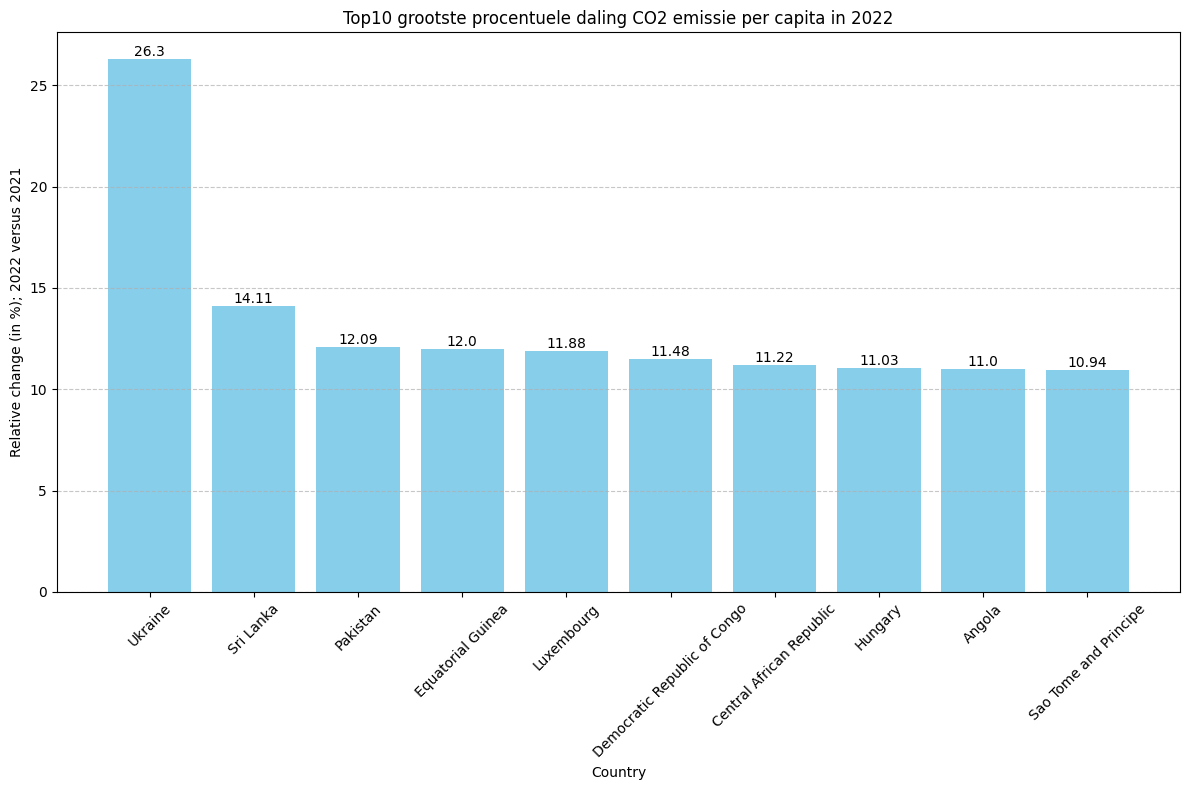

In [ ]:
# Sorteren van de top 10 voor weergave in de grafiek. nr 1 links
df_smallest_changer = df_smallest_changer.sort_values(by='delta 2022', ascending=False)

# Plotting
plt.figure(figsize=[12,8])
plt.bar(df_smallest_changer.index, df_smallest_changer['delta 2022'], color='skyblue')  # Use the index values for the x-axis
bars = plt.bar(df_smallest_changer.index, df_smallest_changer['delta 2022'], color='skyblue')  # Use the index values for the x-axis

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.xlabel('Country')  # label x-as
plt.ylabel('Relative change (in %); 2022 versus 2021')  # label y-as
plt.title('Top10 grootste procentuele daling CO2 emissie per capita in 2022')  # Titel
plt.xticks(rotation=45)  # Rotate x-as labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # grid lines y as
plt.tight_layout()  # aanpassing layout
plt.show()  # Show the plot